# Introduction to regression models

Import relevant libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [71]:
warnings.filterwarnings('ignore')

## Load data

In [2]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [13]:
wine_df.shape

(1599, 12)

In [242]:
wine_df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

<AxesSubplot:>

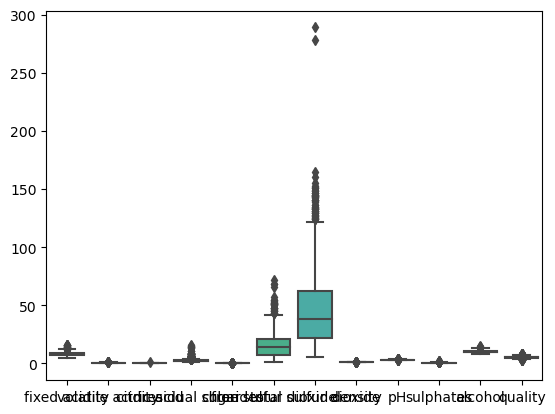

In [245]:
sns.boxplot(data=wine_df)

## Create your own linear model

Get 100 samples with random state (seed) = 1

In [3]:
samples=wine_df.sample(n=100, random_state=1)

In [20]:
samples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


Plot pH in function of fixed acidity

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

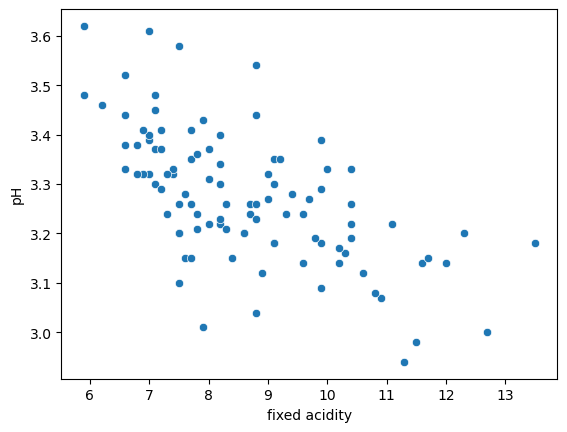

In [4]:
sns.scatterplot(data=samples,x='fixed acidity',y='pH')

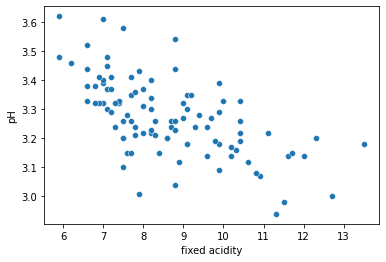

What can you say about pH and fixed acidity? are they correlated ? 

We can see that pH and fixed acidity seem negatively correlated

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [27]:
samples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


In [5]:
samples['y_line'] = 3.8-0.05*samples['fixed acidity']

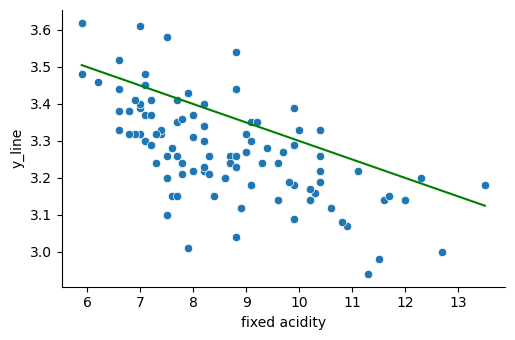

In [6]:
ax = sns.relplot(kind='scatter', x='fixed acidity', y='pH', data=samples, height=3.5, aspect=1.5)
ax.map_dataframe(sns.lineplot, 'fixed acidity', 'y_line', color='g')

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [20]:
b0=3.5
X=samples['fixed acidity']
y=samples['pH']
b1=-0.05
b0_range=[3.5,4.5]

In [8]:
def predict(x,b0,b1) :
    y_pred =[]
    y_pred=b0+b1*x
    return y_pred

In [9]:
def calculate_error(y,y_pred):
    errors=[]
    errors=(y-y_pred)**2
    error = errors.sum()
    return error

In [10]:
def find_best_b0(b0_range,b1,X,y) :
    error_min=999
    for b0 in np.arange(b0_range[0],b0_range[1],0.001) :
        y_pred = predict(X,b0,b1)
        error = calculate_error(y,y_pred)
        if error < error_min :
            error_min=error
            best_b0 = b0
    return best_b0

In [11]:
b1_range=[-1.5,0]

In [12]:
def find_best_b1(b1_range,b0,X,y) :
    error_min=999
    for b1 in np.arange(b1_range[0],b1_range[1],0.001) :
        y_pred = predict(X,b0,b1)
        error = calculate_error(y,y_pred)
        if error < error_min :
            error_min=error
            best_b1 = b1
    return best_b1

In [13]:
def find_best_b(b0_range,b1_range,iterations,b0,b1,X,y):
    for iteration in range (iterations+1) :
        b0=find_best_b0(b0_range,b1,X,y)
        b1=find_best_b1(b1_range,b0,X,y)
    return b0,b1

In [21]:
b0,b1=find_best_b(b0_range,b1_range,4,b0,b1,X,y)

In [22]:
print(b0,b1)

3.7039999999999775 -0.050000000000159694


In [16]:
samples['y_line'] = b0+b1*samples['fixed acidity']

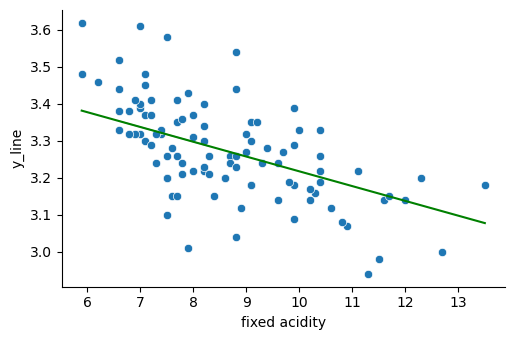

In [17]:
ax = sns.relplot(kind='scatter', x='fixed acidity', y='pH', data=samples, height=3.5, aspect=1.5)
ax.map_dataframe(sns.lineplot, 'fixed acidity', 'y_line', color='g')

Compare to seaborn regplot

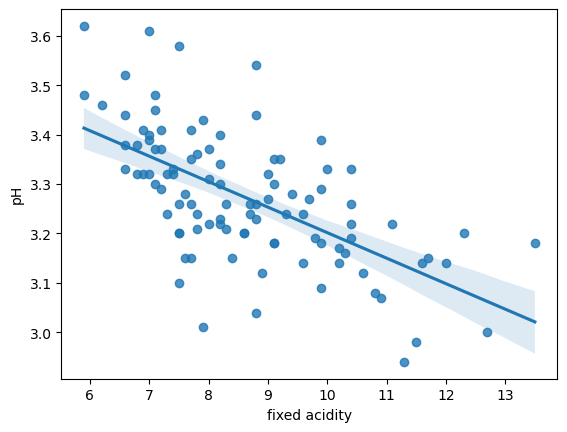

In [18]:
sns.regplot(y='pH', x='fixed acidity', data=samples);

In [23]:
samples['y_line'] = b0+b1*samples['fixed acidity']

<AxesSubplot:xlabel='fixed acidity', ylabel='y_line'>

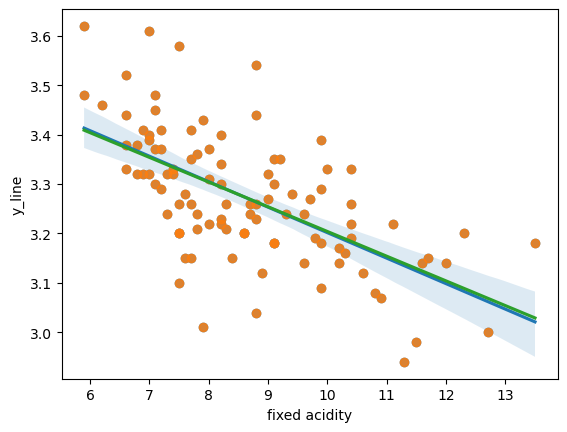

In [24]:
ax = sns.regplot(x=samples['fixed acidity'], y=samples['pH']);
sns.regplot(x=samples['fixed acidity'], y=samples['pH'], fit_reg=False, ax=ax);
sns.regplot(x=samples['fixed acidity'], y=samples['y_line'],scatter=False, ax=ax)

In [25]:
print(calculate_error(samples['pH'],samples['y_line']))

1.085944999999828


How far is your linear model from seaborn model?

My linear model seems pretty close to seaborn's model

How do you evaluate the performance of your linear models at each iteration ?

With the sum of squared error at each change of b0 or b1

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

I think this is the OLD method, except the OLS method must try different starting intercepts, and itterate more times and more precisely

Compare with the Linear regression used in scikit learn

In [152]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = samples[['fixed acidity']]
y = samples['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


Are you close to these values ?

In [154]:
print(b1,b0)

-0.04999999999999871 3.6999999999999957


How do you interpret these values? What do they say about the pH and fixed acidity?

These values mean that when the fixed acidity increases of 1 unit, the pH de decreases of 0.05
When the fixed acidity is around 0, the pH should be at around 3.7

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [26]:
samples=wine_df.sample(n=100,random_state=60)

Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

In [27]:
samples['y_line'] = b0+b1*samples['fixed acidity']

<AxesSubplot:xlabel='fixed acidity', ylabel='y_line'>

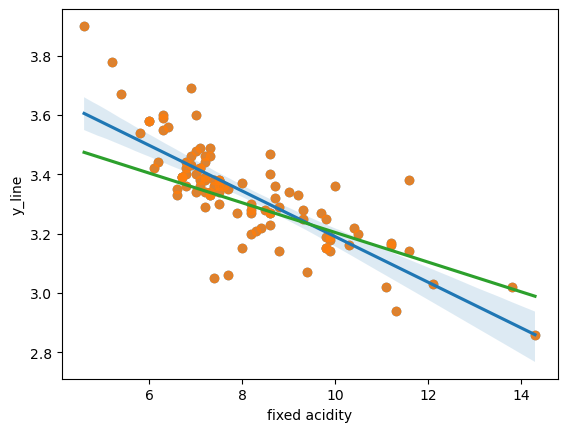

In [28]:
ax = sns.regplot(x=samples['fixed acidity'], y=samples['pH']);
sns.regplot(x=samples['fixed acidity'], y=samples['pH'], fit_reg=False, ax=ax)
sns.regplot(x=samples['fixed acidity'], y=samples['y_line'],scatter=False, ax=ax)

This linear model dosen't really fit with this sample. This is because the model is very specific, as it's based on a single sample

How can you solve the problem ?

We can solve this by training our model on multiple samples

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [217]:
samples=wine_df.sample(n=100,random_state=5)

<AxesSubplot:xlabel='pH', ylabel='quality'>

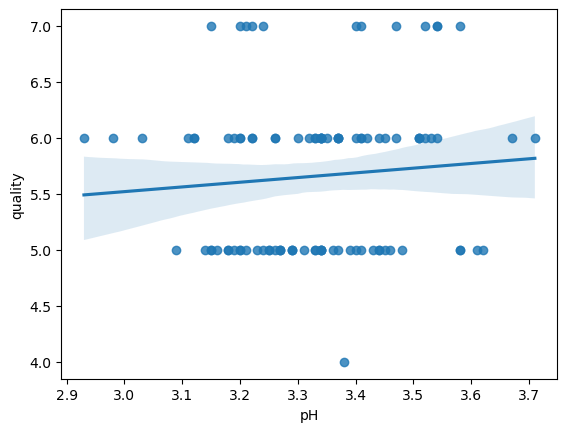

In [218]:
sns.regplot(y='quality', x='pH', data=samples)

In [219]:
X=samples['fixed acidity']
y=samples['quality']
b1=-0.05
b0_range=[4.5,6.5]
b1_range=[-1,1]

In [220]:
b0,b1=find_best_b(b0_range,b1_range,4,b0,b1,X,y)

In [221]:
print(b0,b1)

6.0699999999999665 -0.049999999999999156


In [222]:
samples['y_line'] = b0+b1*samples['fixed acidity']

<AxesSubplot:xlabel='fixed acidity', ylabel='y_line'>

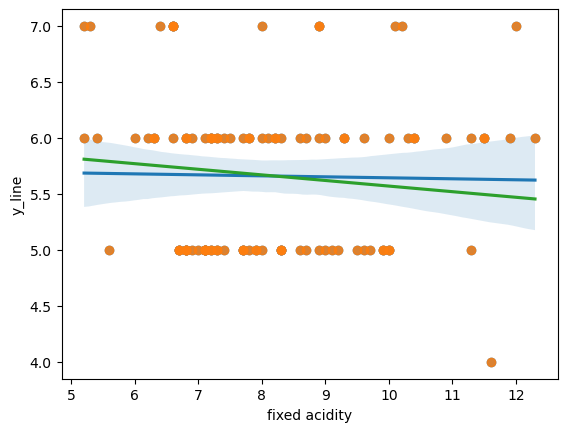

In [223]:
ax = sns.regplot(x=samples['fixed acidity'], y=samples['quality']);
sns.regplot(x=samples['fixed acidity'], y=samples['quality'], fit_reg=False, ax=ax);
sns.regplot(x=samples['fixed acidity'], y=samples['y_line'],scatter=False, ax=ax)

How good is this model performing? What is the error? is it low or high ?

In [224]:
print(calculate_error(samples['quality'],samples['y_line']))

48.87899999999997


This is a high error

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [39]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = samples[['fixed acidity']]
y = samples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

NameError: name 'LinearRegression' is not defined

This is a very bad score. The fact that it's a negative means that it is worse than a horizontal line.

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


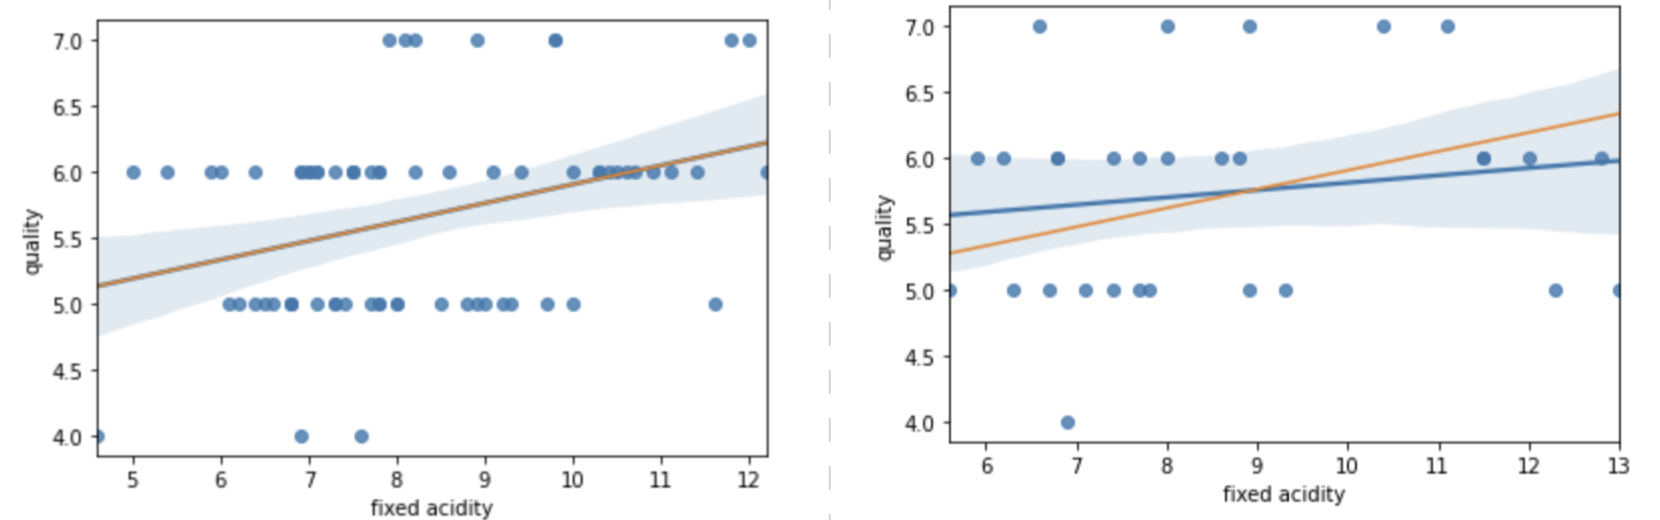

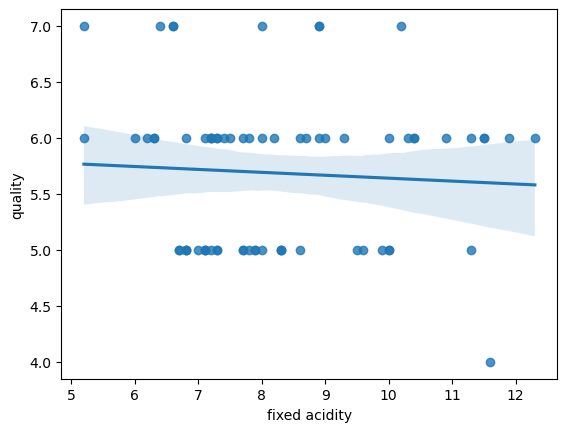

In [228]:
sns.regplot(y=y_train, x=X_train, data=samples);

In [231]:
y_line=b0+b1*X_train

<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>

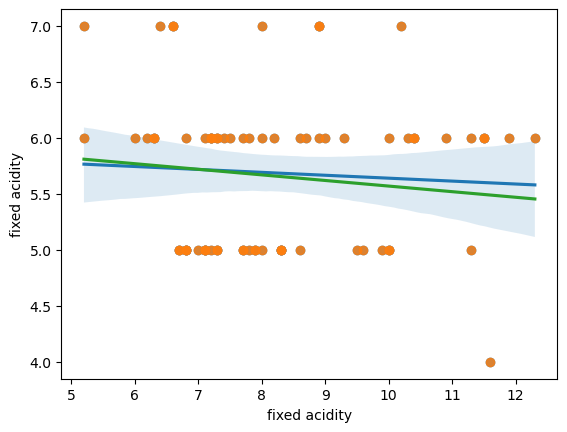

In [232]:
ax = sns.regplot(x=X_train, y=y_train);
sns.regplot(x=X_train, y=y_train, fit_reg=False, ax=ax);
sns.regplot(x=X_train, y=y_line,scatter=False, ax=ax)

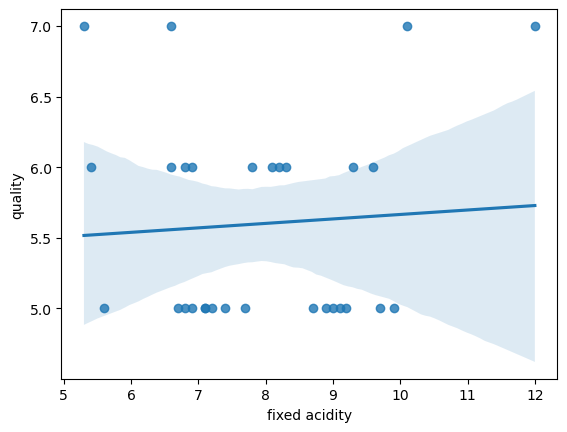

In [233]:
sns.regplot(y=y_test, x=X_test, data=samples);

In [234]:
y_line=b0+b1*X_test

<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>

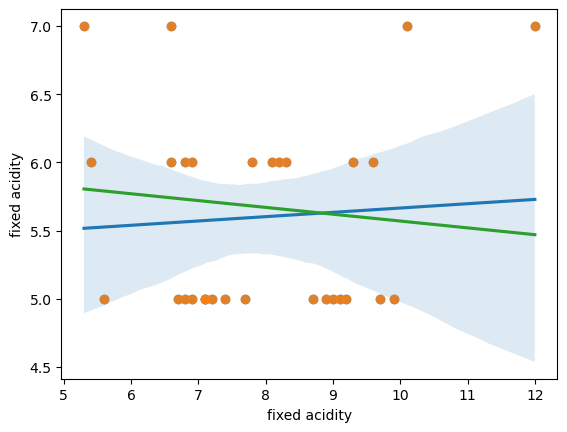

In [235]:
ax = sns.regplot(x=X_test, y=y_test);
sns.regplot(x=X_test, y=y_test, fit_reg=False, ax=ax);
sns.regplot(x=X_test, y=y_line,scatter=False, ax=ax)

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

In [236]:
# Choose your feature and your target
X = samples[['volatile acidity']]
y = samples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.19545026616932282

In [237]:
# Choose your feature and your target
X = samples[['alcohol']]
y = samples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.293682241431208

In [238]:
# Choose your feature and your target
X = samples[['sulphates']]
y = samples['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.0682336354515195

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [247]:
X = samples[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

In [248]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.2164860856921097

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [249]:
X = samples[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [250]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.3736388047643394

If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

In [251]:
X = samples[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]]

In [252]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

1.0

The precision is perfect, because quality is perfectly correlated with quality
i.e : if I tell you a wine has a quality of 5, there is a 100% chance you can guess its quality

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

It's very possible that some features are useless, but I lack the professionnal knowledge to tell which ones would be.

Do you know a method to identify them? 

If you use the OLS method, you can get access to the p-values which can help you find which features are not useful.

How can you find the best combination of features to increase the performance of the model?

You can try to fit a linear model with all the features at first, then you can remove some features according to their p-values. You would then have to try again a linear model and see if you get a better adj. R². I think you would have to repeat this process and adjust your features until you have the best model.

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [29]:
wine_df['goodquality'] = np.where(wine_df['quality']> 6, 1, 0)

In [32]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

In [31]:
wine_df['goodquality'].value_counts()
#This is unbalanced

0    1382
1     217
Name: goodquality, dtype: int64

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [33]:
samples=wine_df.sample(n=100,random_state=2)

In [34]:
samples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
407,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,7,1
1220,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6,0
1200,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6,0
308,10.3,0.43,0.44,2.4,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6,0
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,0
143,6.3,0.39,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.4,5,0
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,5,0


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [46]:
# Choose your feature and your target
X = samples[["fixed acidity","volatile acidity","citric acid","residual sugar"]]
y = samples['goodquality']

In [47]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)


0.8

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

With a classification report, every metric is important depending of the context.
The score given by model.score is the accuracy on the classification report. This is a useful metric, but it can't be the only one used. In this context, the weighted avg. F1-score is more adapted since our classes are unbalanced.
Moreover, we have to be really careful about the precision and recall for all our classes.
In this case we have a good precision and recall for 0, but terrible for 1, because the model only guesses 0. This means that it the model is really bad.

In [49]:
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.00      0.00      0.00         5

    accuracy                           0.80        30
   macro avg       0.41      0.48      0.44        30
weighted avg       0.69      0.80      0.74        30



Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [141]:
# Choose your feature and your target
X = samples[['pH']]
y = samples['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression(max_iter=1000)

# Fit the model with the train set
model.fit(X_train, y_train)


y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



In [165]:
# Choose your feature and your target
X = samples[['volatile acidity']]
y = samples['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression(max_iter=1000)

# Fit the model with the train set
model.fit(X_train, y_train)


y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



In [139]:
# Choose your feature and your target
X = samples[['alcohol']]
y = samples['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression(max_iter=1000)

# Fit the model with the train set
model.fit(X_train, y_train)


y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



In [140]:
# Choose your feature and your target
X = samples[['fixed acidity']]
y = samples['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression(max_iter=1000)

# Fit the model with the train set
model.fit(X_train, y_train)


y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [77]:
samples.columns[1]

'volatile acidity'

In [145]:
report = classification_report(y_test, y_pred,output_dict=True )
acc = report['accuracy']
acc

0.8333333333333334

In [73]:
def get_weighted_f1(y_test,y_pred) :
    report = classification_report(y_test, y_pred,output_dict=True )
    weighted_f1 = report['weighted avg']['f1-score']
    return weighted_f1

In [88]:
for col in range(11) :
    colname=samples.columns[col]
    print(colname)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [ ]:
# Choose your feature and your target
X = samples[['fixed acidity']]
y = samples['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)


y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

In [146]:
# Choose your feature and your target
X = samples[["fixed acidity","volatile acidity","citric acid","residual sugar"]]
y = samples['goodquality']

In [152]:
# Choose your feature and your target
X = samples[["citric acid"]]
y = samples['goodquality']

In [153]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.8333333333333334